# NFL Birthday Analysis
I am currently in the SMU Masters Data Science Program and we discussing a topic on observational vs experimental studies, and one of the studies we were analyzing was the study performed on the __relative age effect in athletics__. [Brewer, L. M., and Cochran, J. J.(June 2013), "August’s Child Is...Favoured by Fortune."](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2013.00661.x) Per Lauren M. Bre and James J. Cochran study:

    "This phenomenon has been speculated on for decades, but the recent flurry of systematic scientific studies of the RAE is thought to have started one evening in January 1983 when Roger and Paula Barnsley, both trained psychologists, attended a Canadian Junior Hockey League game. __Glancing through the programme, they noticed that the players had a disproportionately high number of birthdates between January and April.__"

Therefore, this is where we shall start, we seek to investigate: __the relative age effect phonomenon utilizing the population of all NFL players birthday and additional stats to see fixed cut-off effect emerges in the NFL__

![](http://www.americanfootballzone.com/wp-content/uploads/2016/12/Terrell-Owens-Best-Celebrations-Happy-Birthday-TO-Celebration-Station-NFL-NOW.jpg)

### Background

_ need to add information to set the scene on Age-based cohorts and the results found in the published test _


Note: I am also utilizing this data set and this notebook as a way to apply my inital learnings from my SMU Masters Data Science Program. 

### Imports

In [1]:
# scrapper 
import requests
from bs4 import BeautifulSoup
import json
import re

import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

## Grab NFL Birthday Data

In [88]:
def birthday_grabber(month):
    birthday = []
    for day in range(1,32):
        url = 'https://www.pro-football-reference.com/friv/birthdays.cgi?month={}&day={}'.format(month, day)
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')

        tbody = soup.find_all('tbody')
        bday = [[td.getText() for td in tbody[i].find_all(['th', 'td'])] for i in range(len(tbody))]
        bday = bday[0]

        try:
            td_counter = 0
            row = []
            for td in bday:
                if td_counter < 26:
                    row.append(td)
                    td_counter += 1
                elif td_counter == 26:
                    row.append(td)
                    birthday.append(row)
                    row = []
                    td_counter = 0
        except Exception as e: print(e)

    return birthday

In [96]:
df = {}
for month in range(1, 13):
    table = birthday_grabber(month)
    temp = pd.DataFrame(table)
    temp['month'] = month
    df[month] = temp
new_df = pd.concat(df.values())

In [105]:
col = ['rank_row', 'player', 'position', 'born', 'first_year', 'last_year','ap1', 'pb', 'st', 'car_av', 'games','pass_comp', 
       'pass_att', 'pass_yds','pass_td', 'pass_lng', 'int','sk', 'sk_yds', 
       'run_att', 'run_yds', 'run_td', 'run_long', 'rec_rec', 'rec_yds', 'rec_td','rec_lng', 'month'
      ]
new_df.columns = col

In [109]:
new_df.to_csv('nfl_birthdays.csv')

In [40]:
bday = pd.read_csv('nfl_birthdays.csv', index_col=0)

In [42]:
bday = bday.reset_index(drop=False)

In [43]:
bday.head()

,index,rank_row,player,position,born,first_year,last_year,ap1,pb,st,...,sk_yds,run_att,run_yds,run_td,run_long,rec_rec,rec_yds,rec_td,rec_lng,month
0,0,1,Grady Allen,LB,1946,1968,1972,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,2,Ralph Anderson,E,1937,1958,1960,0,0,2,...,NaN,NaN,NaN,NaN,NaN,55.0,791.0,6.0,46.0,1
2,2,3,Teddy Andrulewicz,WB,1905,1930,1930,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1
3,3,4,Justin Armour,WR,1973,1995,1999,0,0,1,...,0.0,4.0,-5.0,0.0,6.0,64.0,861.0,7.0,54.0,1
4,4,5,Marvin Austin,DL,1989,2012,2014,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Descriptive Statistics for NFL Birthday Analysis

To begin our analysis we will leverage the use of descriptive or summary statistics to gain insights into the birthday distribuion for 25,000 players that have played in the NFL. 


To start of, since we are using `pandas` as our main package for data wrangling, we will leverage the use of the `describe()` function that provides basic descriptive statistics such as:

* mean (or average) - provides an easy way to measure the middle of the dataset, commonly known as _"central tendency"_. However, one of the mean's weaknesses is that it is prone to distortion by extreme values or outliers

* standard deviation (spread) - The std provides a measure on how dispersed the data is from the mean. 

* Interquartile range - provide insights in the difference between the 75th percentile and the 25th percentile. A percentile is basically a relative score that provides a comparision with how everyone else in the population performed. 


Below we will call the descriptive statistics function `describe()` for the `month` and `year` all NFL players were born.

In [18]:
bday[['month','born']].describe()

,month,born
count,25546.000000,25546.000000
mean,6.477726,1956.567721
std,3.490489,27.743127
min,1.000000,1876.000000
25%,3.000000,1939.000000
50%,7.000000,1962.000000
75%,9.000000,1979.000000
max,12.000000,1998.000000


Therefore, from the descriptive statistice produced above, we can see that the average birth month was 6.4 `June` and birth year 1956. As of this analsyis (Nov 2018) the youngest player in the NFL was 20 years old.

Below is a visualization as a count plot of all birthday months for players who played at least 7 games.

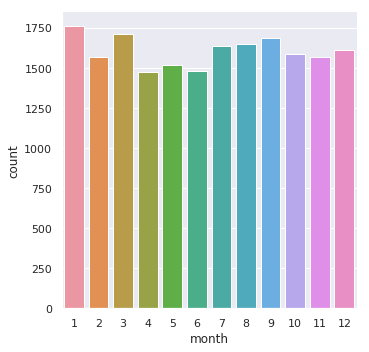

In [19]:
sns.catplot(x="month", kind="count", data=bday[bday.games > 7]);

Lets see the distribution of birthdays by decade

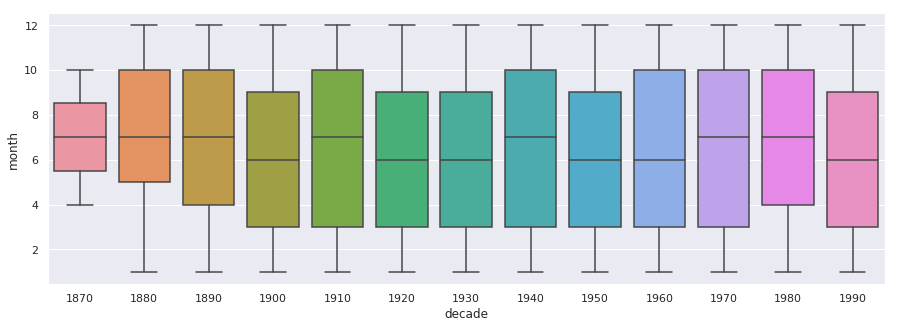

In [51]:
# compute the nearest 10 for player's decade birth
bday['decade'] = (bday['born'] // 10) * 10

# create box chart and plot players birth month disctribution arcross decades
plt.figure(figsize=(15,5))
sns.boxplot(x="decade", y="month", data=bday)   

plt.show()
plt.clf()
plt.close()

### Central Tendancy Measures
TBD